# Reading data from a csv

In [39]:
import pandas as pd
import numpy as np
import scipy as ss
%matplotlib inline
df = pd.read_csv('normalized_counts_core.csv')

In [57]:
df[:3]

,Unnamed: 0,UR1,UTI1,UR3,UTI3,UR6,UTI6,UR7,UTI7,UR14,...,UR56,UTI56,UR57,UTI57,UR66,UTI66,UR68,UTI68,UR86,UTI86
0,14805_sufB_1,883.961971,105.957284,8.074955,2.744961,840.163797,1455.120536,1962.428184,3049.689971,2266.037332,...,2340.879988,339.540669,2422.460042,229.798671,1964.683799,523.941690,501.821950,700.596378,2646.631565,1084.773496
1,14806_iscA_1,253.550220,15.136755,0.000000,0.000000,359.725304,365.812425,737.343382,759.855414,796.514991,...,936.277835,120.075303,1121.383231,83.563153,724.239587,299.395251,150.457027,251.496136,788.173651,299.583508
2,14807_hypothetical_protein,728.437314,770.082405,0.000000,0.000000,474.161407,467.426988,643.771887,616.098984,381.452805,...,645.197399,255.790667,898.808229,146.235518,828.052710,74.848813,1249.629198,350.298189,868.466671,381.779705


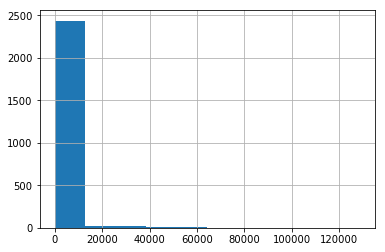

In [40]:
df['UTI1'].hist()

In [38]:
df.shape

(2502, 27)

In [10]:
uti1 = df['UTI1']

In [61]:
uti1.head()

0    105.957284
1     15.136755
2    770.082405
3     96.496812
4      3.784189
Name: UTI1, dtype: float64

In [62]:
uti1_log = uti1_l = np.log2(uti1+1)

In [63]:
uti1_log.head()

0    6.740891
1    4.012279
2    9.590741
3    6.607283
4    2.258274
Name: UTI1, dtype: float64

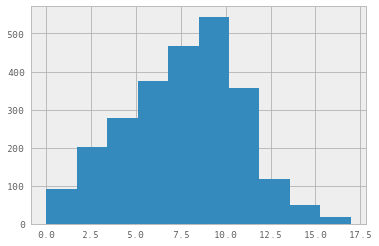

In [65]:

uti1_log.hist()

In [69]:
#percentage of values below certaion value
top20 = uti1[uti1 > uti1.quantile(0.8)]
top20.head()

23     6582.596278
24     4688.609824
25    55493.235484
42     5048.107752
57     4071.787063
Name: UTI1, dtype: float64

In [71]:
top20_l = uti1_log[uti1_log > uti1_log.quantile(0.2)]
top20_l.head()

0     6.740891
2     9.590741
3     6.607283
6     5.536372
14    6.688923
Name: UTI1, dtype: float64

In [7]:
#inverse normalization
#R qnorm is scipy.stats.norm.ppf()
import scipy.stats
x = [10, 1,7, 3, 5]
scipy.stats.stats.rankdata(x)

array([ 5.,  1.,  4.,  2.,  3.])

In [16]:
x = uti1.head()
print(x)
print(scipy.stats.stats.rankdata(x))
print(x.rank())

0    105.957284
1     15.136755
2    770.082405
3     96.496812
4      3.784189
Name: UTI1, dtype: float64
[ 4.  2.  5.  3.  1.]
0    4.0
1    2.0
2    5.0
3    3.0
4    1.0
Name: UTI1, dtype: float64


In [26]:
def invnorm(x):
    return scipy.stats.norm.ppf((x.rank() -0.5)/x.count())

In [27]:
print(invnorm(x))

[ 0.52440051 -0.52440051  1.28155157  0.         -1.28155157]


In [34]:
huti_norm = pd.Series(invnorm(uti1))

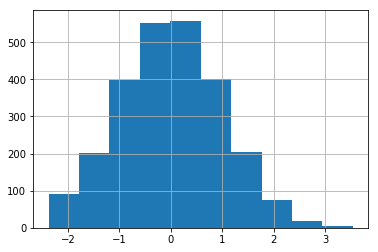

In [41]:
huti_norm.hist()

In [42]:
huti_norm.min()

-2.3742228860654997

In [44]:
(huti_norm.max() - huti_norm.min())/5

1.1829035442050935

In [48]:
len(huti_norm[huti_norm > huti_norm.quantile(0.5)])

1250